In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':'1_lQoiJigQ5QV44JrKYqP0Rx4z4LLA3w1'}) # replace the id with id of file you want to access
downloaded.GetContentFile('heart.csv') 

# Import libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis


In [0]:
df = pd.read_csv("heart.csv")

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.shape

(303, 14)

In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Missing values

In [0]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There are no missing values in the dataset.

# Data Formatting

To make analysis easier columns are changed to meaningful names.

In [0]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Data Visualization

(14.5, -0.5)

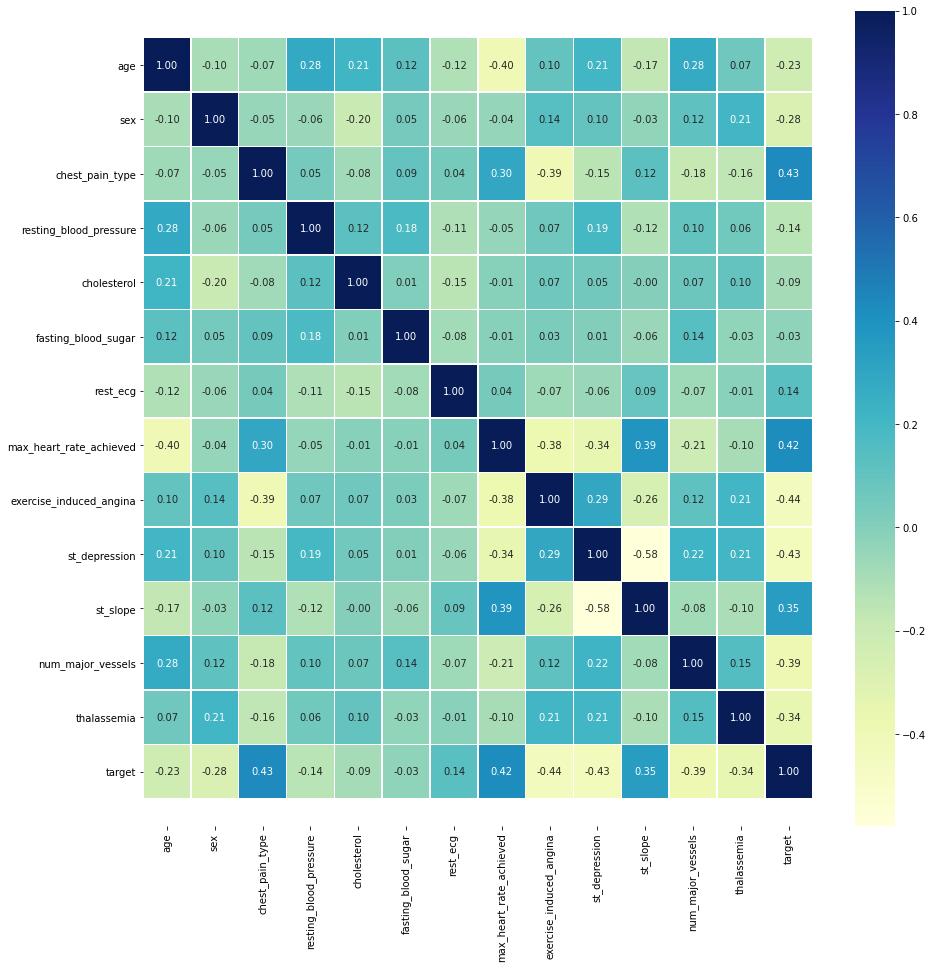

In [0]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Heart Disease ')

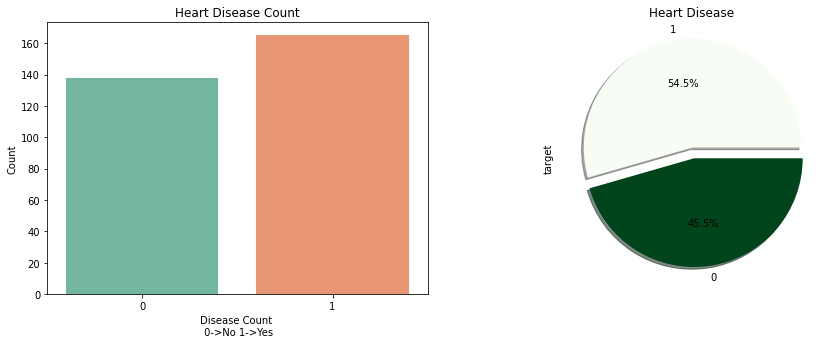

In [0]:
fig,ax=plt.subplots(1, 2, figsize = (15,5))
sns.countplot(data=df, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n 0->No 1->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
df['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease ")

- Percentage of Patients not Having Heart Disease: 45.5%
- Percentage of Patients Having Heart Disease: 54.4%

# Analyzing Categorical feaures

### Sex

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

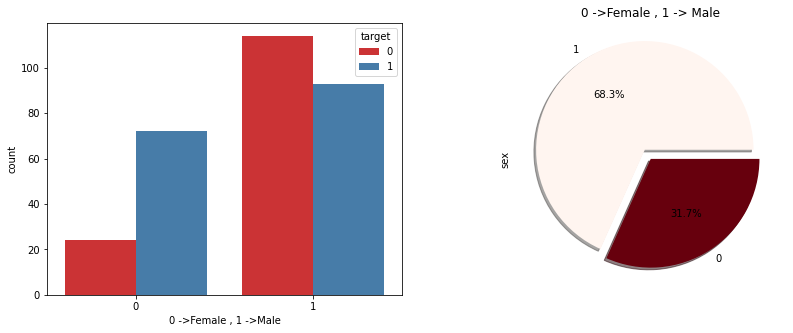

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=df,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
df.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

- Number of Women suffering from Heart Disease are more than Men but Men population is more than Women

### Fasting blood sugar

Text(0.5, 1.0, '0 -> fbs <120 , 1 -> fbs>120')

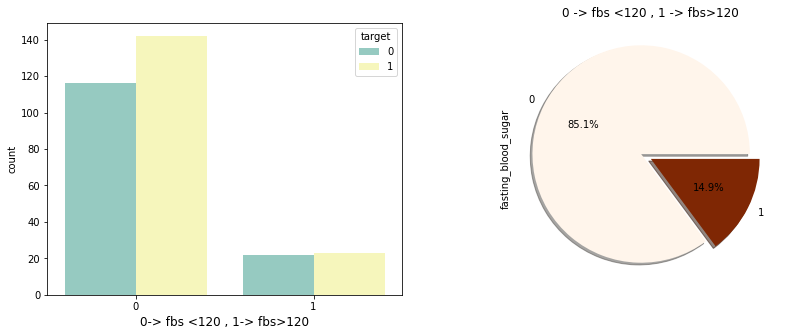

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fasting_blood_sugar',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fbs <120 , 1-> fbs>120",size=12)
df.fasting_blood_sugar.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fbs <120 , 1 -> fbs>120",size=12)


- People having fbs < 120 have more chance of having Heart Disease than people havnig fbs >120

### Resting electrocardiographic results

Text(0.5, 1.0, 'resting electrocardiographic')

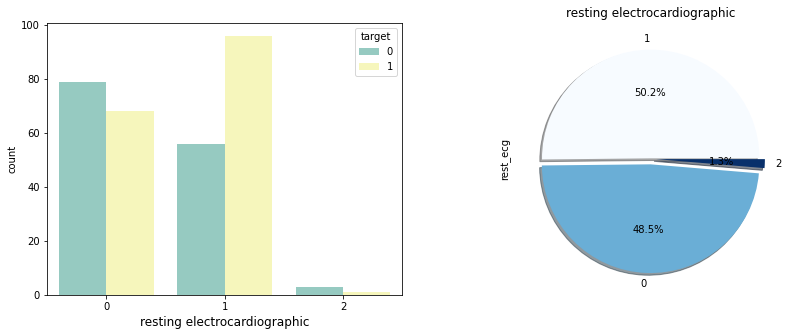

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='rest_ecg',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
df.rest_ecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

- If resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease

### The slope of the peak exercise ST segment 

Text(0.5, 1.0, 'peak exercise ST segment ')

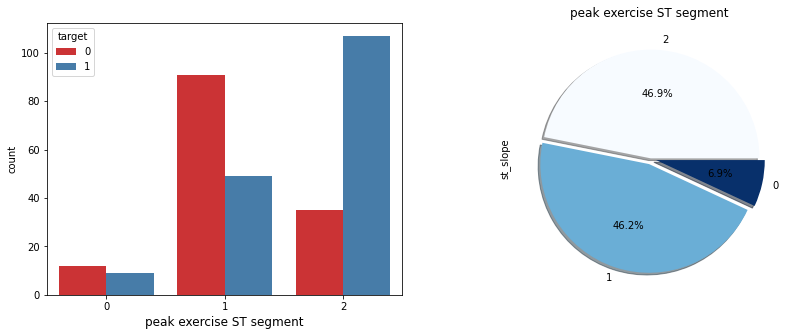

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='st_slope',data=df,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
df.st_slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

- People having up sloping are more prone to Heart Disease than flat and downsloping.

### Number of major vessels colored by flourosopy

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

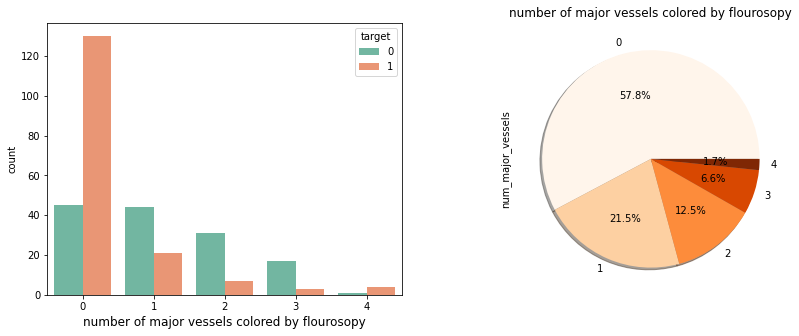

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='num_major_vessels',data=df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
df.num_major_vessels.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

- The more lighter the color the more probability the person can have Heart disease.

### Thalassemia

Text(0.5, 1.0, 'Thalassemia')

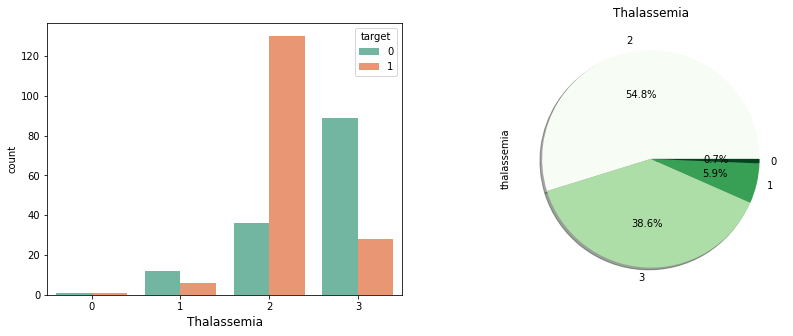

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thalassemia',data=df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("Thalassemia",size=12)
df.thalassemia.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title("Thalassemia",size=12)

- It is obvious that fixed defect cause heart disease at a larger rate.

### Chest Pain

Text(0.5, 1.0, 'Chest pain')

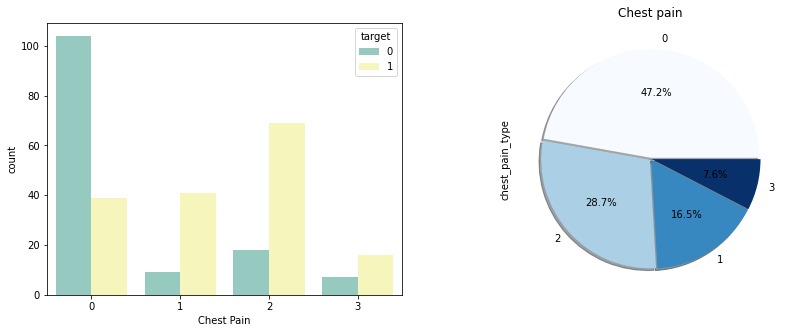

In [0]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='chest_pain_type',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
df.chest_pain_type.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")

- People with typical angina has less chance of getting heart disease when compared with other chest pain type, which have a large probability of getting heart disease.

# Analyzing Continuos feaures

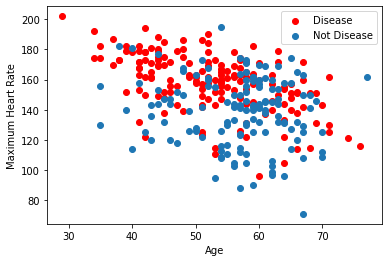

In [0]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

- The above scatterplot clearly conveys the message that if heart rate is more the person is more likely to have heart disease.
  In case of aged people less heart rate can cause disease.Age is negatively correlated with Disease and maximum heart rate.

# Analyzing by combining Continuous feature with categorial feature


### Resting blood pressure vs Sex

Text(0.5, 1.0, 'resting blood pressure V/S Sex')

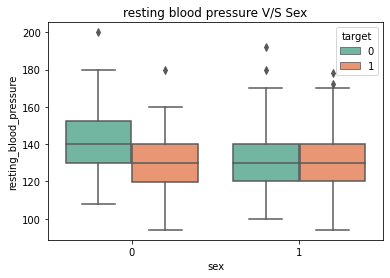

In [0]:
fig,ax=plt.subplots()
sns.boxplot(y='resting_blood_pressure',data=df,x='sex',hue='target',palette='Set2')
ax.set_title("resting blood pressure V/S Sex")



- resting blood pressure has a impact on female (i.e) female with high blood pressure has less chance of heart disease

### Cholestrol vs Sex

Text(0.5, 1.0, 'Cholestrol V/S Sex')

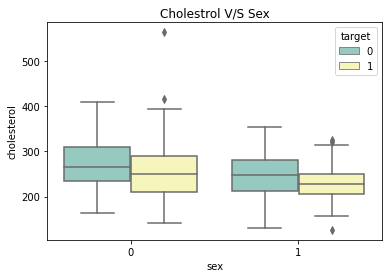

In [0]:
fig,ax=plt.subplots()
sns.boxplot(y='cholesterol',data=df,x='sex',hue='target',palette='Set3')
ax.set_title("Cholestrol V/S Sex")

- people with less cholestrol might have heart disease 

### Distribution of features

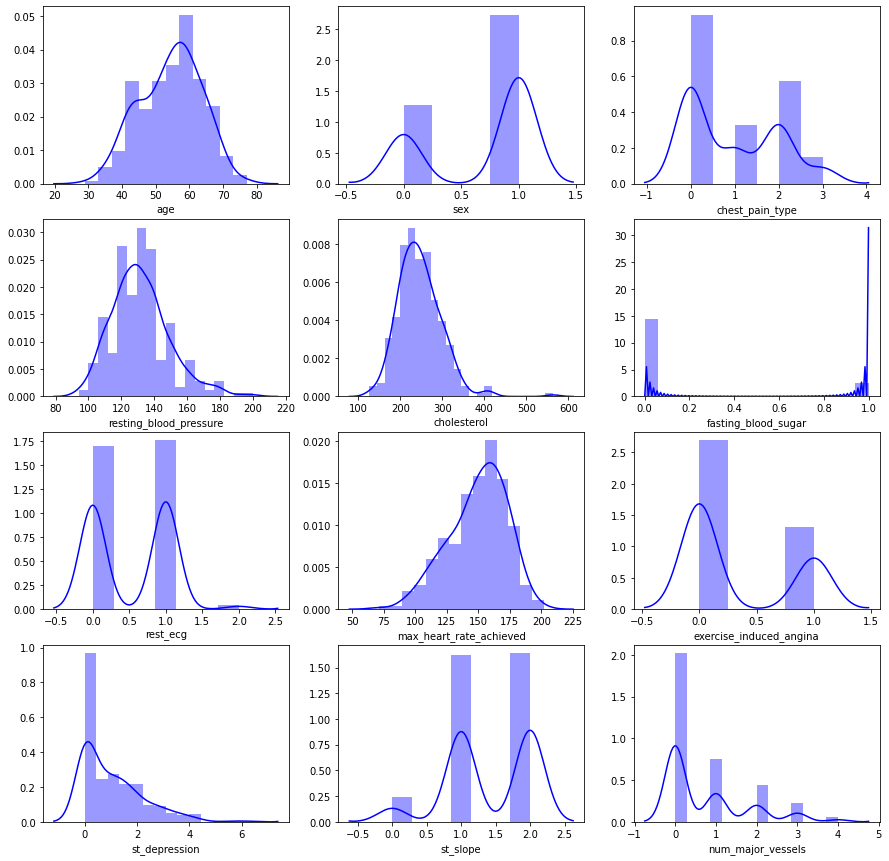

In [0]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(df.iloc[:,i],kde=True, color='blue')

In [0]:
a = pd.get_dummies(df['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(df['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(df['st_slope'], prefix = "st_slope")

In [0]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [0]:
df = df.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


# Normalization

In [0]:
data_scaled=MinMaxScaler().fit_transform(df)
data_scaled=pd.DataFrame(data=data_scaled, columns=df.columns)
data_scaled.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [0]:
X = df.iloc[:, df.columns != 'target'].values
Y = df.iloc[:, df.columns == 'target'].values.ravel()

# Train-Test split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 21)
(242,)
(61, 21)
(61,)


# Modelling

### Logistic regression

In [0]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
acc_logreg=logreg.score(X_test, Y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_logreg))

Accuracy of logistic regression classifier on test set: 0.85


(2.5, -0.5)

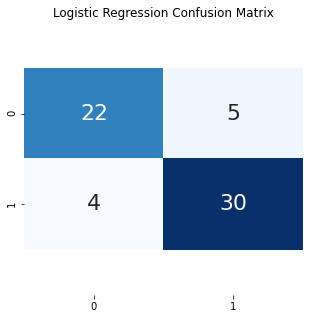

In [0]:
confusion_matrix_Logreg = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix_Logreg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Naive Bayes

In [0]:
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = NB.predict(X_test)
acc_NB=NB.score(X_test, Y_test)
print('Accuracy of NB classifier on test set: {:.2f}'.format(acc_NB))

Accuracy of NB classifier on test set: 0.87


(2.5, -0.5)

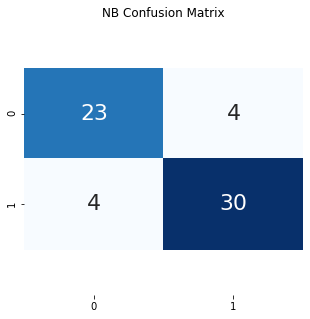

In [0]:
confusion_matrix_NB = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("NB Confusion Matrix")
sns.heatmap(confusion_matrix_NB,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Decision Tree 

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = decision_tree.predict(X_test)
acc_decision_tree=decision_tree.score(X_test, Y_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(acc_decision_tree))

Accuracy of Decision tree classifier on test set: 0.75


(2.5, -0.5)

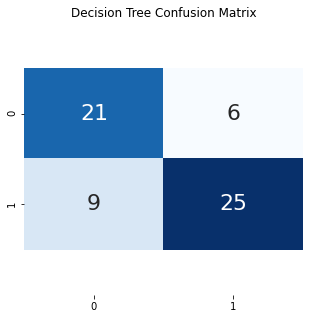

In [0]:
confusion_matrix_decision_tree = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix_decision_tree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- KNN couldn't generalize well to the test set.Other algorithms works better for this dataset. 